<a href="https://colab.research.google.com/github/agt7/dev/blob/master/logisticregression_practice_0815_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_df = pd.read_csv("../input/avazu-ctr-prediction/train.gz", nrows=100000)
unused_cols = ["id", "hour", "device_id", "device_ip"]
label_col = "click"
train_df = train_df.drop(unused_cols, axis=1)
X_dict_train = list(train_df.drop(label_col, axis=1).T.to_dict().values())
y_train = train_df[label_col]

In [ ]:
test_df = pd.read_csv("../input/avazu-ctr-prediction/train.gz", header=0, skiprows=(1,100000), nrows=100000)
test_df = test_df.drop(unused_cols, axis=1)
X_dict_test = list(test_df.T.to_dict().values())
y_test = test_df[label_col]

In [ ]:
from sklearn.feature_extraction import DictVectorizer

vectorizer = DictVectorizer(sparse=True)
X_train = vectorizer.fit_transform(X_dict_train)
X_test = vectorizer.transform(X_dict_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'C': [0.01, 0.1, 1, 10, 100], "penalty": ["l1", "l2"]}
grid_search = GridSearchCV(clf, parameters, n_jobs=-1, cv=3, scoring="roc_auc")
grid_search.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [ ]:
grid_search.best_params_

{'C': 100, 'penalty': 'l2'}

In [ ]:
clf_best = grid_search.best_estimator_

In [ ]:
y_pred = clf_best.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

accuracy_score(y_test, y_pred)

0.82396

In [ ]:
confusion_matrix(y_test, y_pred)

array([[82290,   220],
       [17384,   106]])

In [ ]:
y_pred_proba = clf_best.predict_proba(X_test)

In [ ]:
y_pred_proba[:,0]

array([0.84654748, 0.84655433, 0.8465701 , ..., 0.81832249, 0.81388322,
       0.90164713])

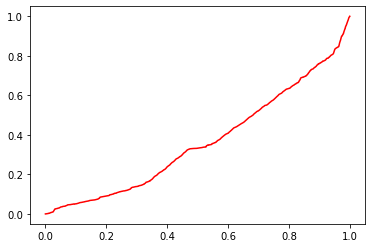

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:,0])
auc = roc_auc_score(y_test, y_pred_proba[:,0])
plt.plot(fpr, tpr, "r-", label="LogisticRegression")

In [ ]:
auc

0.3639603030947476